## 1. Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket Scikit Learn, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter http://scikit-learn.org/stable/tutorial/basic/tutorial.html an, um die grundsätzliche Syntax zu erlernen.

### a.)
Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion digits = load_digits(). Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes digits.DESCR. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix digits.data, die zugehörigen Labels stehen in dem Vektor digits.target. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

In [1]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

In [2]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
x.shape

(1797, 64)

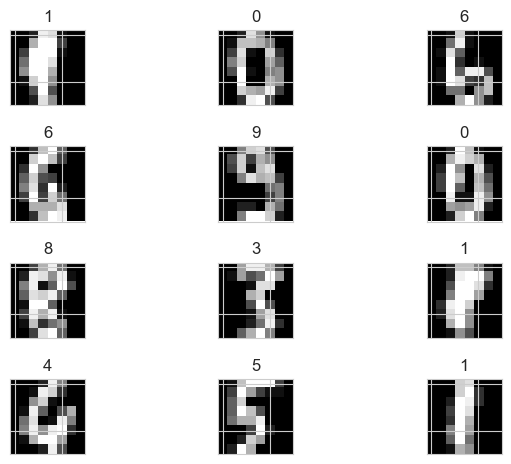

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3)

fig.tight_layout()

for ax in axs.reshape(-1):

    idx = np.random.choice(x.shape[0], 1)

    ax.imshow(x[idx].reshape((8, 8)), cmap="gray")
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title(str(y[idx][0]))

### b.)
Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion sklearn.model_selection.train_test_split(). Trainieren Sie einen Supportvektor-Klassifikator (Standard in Scikit Learn ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, Treffergenauigkeit, engl. Accuracy) im Trainings- und Testdatensatz mithilfe der Funktion SVC.score(). Underfitting liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei Overfitting liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? Probieren Sie alternativ die SVM-Parameter und und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?

In [10]:
from sklearn.model_selection import train_test_split

random_seed = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=random_seed)

In [11]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", C=1.0, gamma=0.015)
svm_clf.fit(x_train, y_train)

SVC(gamma=0.015)

In [12]:
svm_clf.score(x_train, y_train)

1.0

In [13]:
svm_clf.score(x_test, y_test)

0.5083333333333333

train_acc >> test_acc --> Overfitting

In [21]:
svm_clf = SVC(gamma=1e-3, C=1e-1)
svm_clf.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001)

In [22]:
svm_clf.score(x_train, y_train)

0.9728601252609603

In [23]:
svm_clf.score(x_test, y_test)

0.9666666666666667

In [24]:
random_seed = 100

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=random_seed)

In [25]:
svm_clf = SVC(gamma=1e-3, C=1e-1)
svm_clf.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001)

In [26]:
svm_clf.score(x_train, y_train)

0.9756437021572721

In [27]:
svm_clf.score(x_test, y_test)

0.9527777777777777

Leichter Einfluss des Train/Test Splitts auf die Model-Performance